# Prediction of Housing Prices In USA

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

the dataset has 21613 rows and 21 columns, price is the target variable(y) and there are 18 features.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


data types of the columns waterfront, view, condition, grade and zipcode must be changed due to their categorical nature.

In [4]:
print("waterfront: ", df["waterfront"].unique())
print("view: ", df["view"].unique())
print("grade: ", df["grade"].unique())
print("condition: ", df["condition"].unique())
print("zipcode: ", df["zipcode"].nunique())

waterfront:  [0 1]
view:  [0 3 4 2 1]
grade:  [ 7  6  8 11  9  5 10 12  4  3 13  1]
condition:  [3 5 4 1 2]
zipcode:  70


On our data, we have some variables which can be named as "categorical". They are waterfront, view, grade, condition. Normally, since their unique variables are ordered, there is no need to make one-hot encoding in our code. But, to calculate PCA, we need to turn them into binary variables. To do that, we need one-hot encoding. Also, due to existance of lattitude and longitue, there is no need to use zip-code variable. Hence, it will be removed.

In [5]:
df['view'] = df['view'].astype('category')
#df['waterfront'] = df['waterfront'].astype('category') later categorical variables are turned into binary format with encoding
df['grade'] = df['grade'].astype('category')
df['condition'] = df['condition'].astype('category')
df["date"] = df["date"].str[:4].astype(int)
df = df.drop(['id','zipcode'],axis=1)

In [6]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\3724843930.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

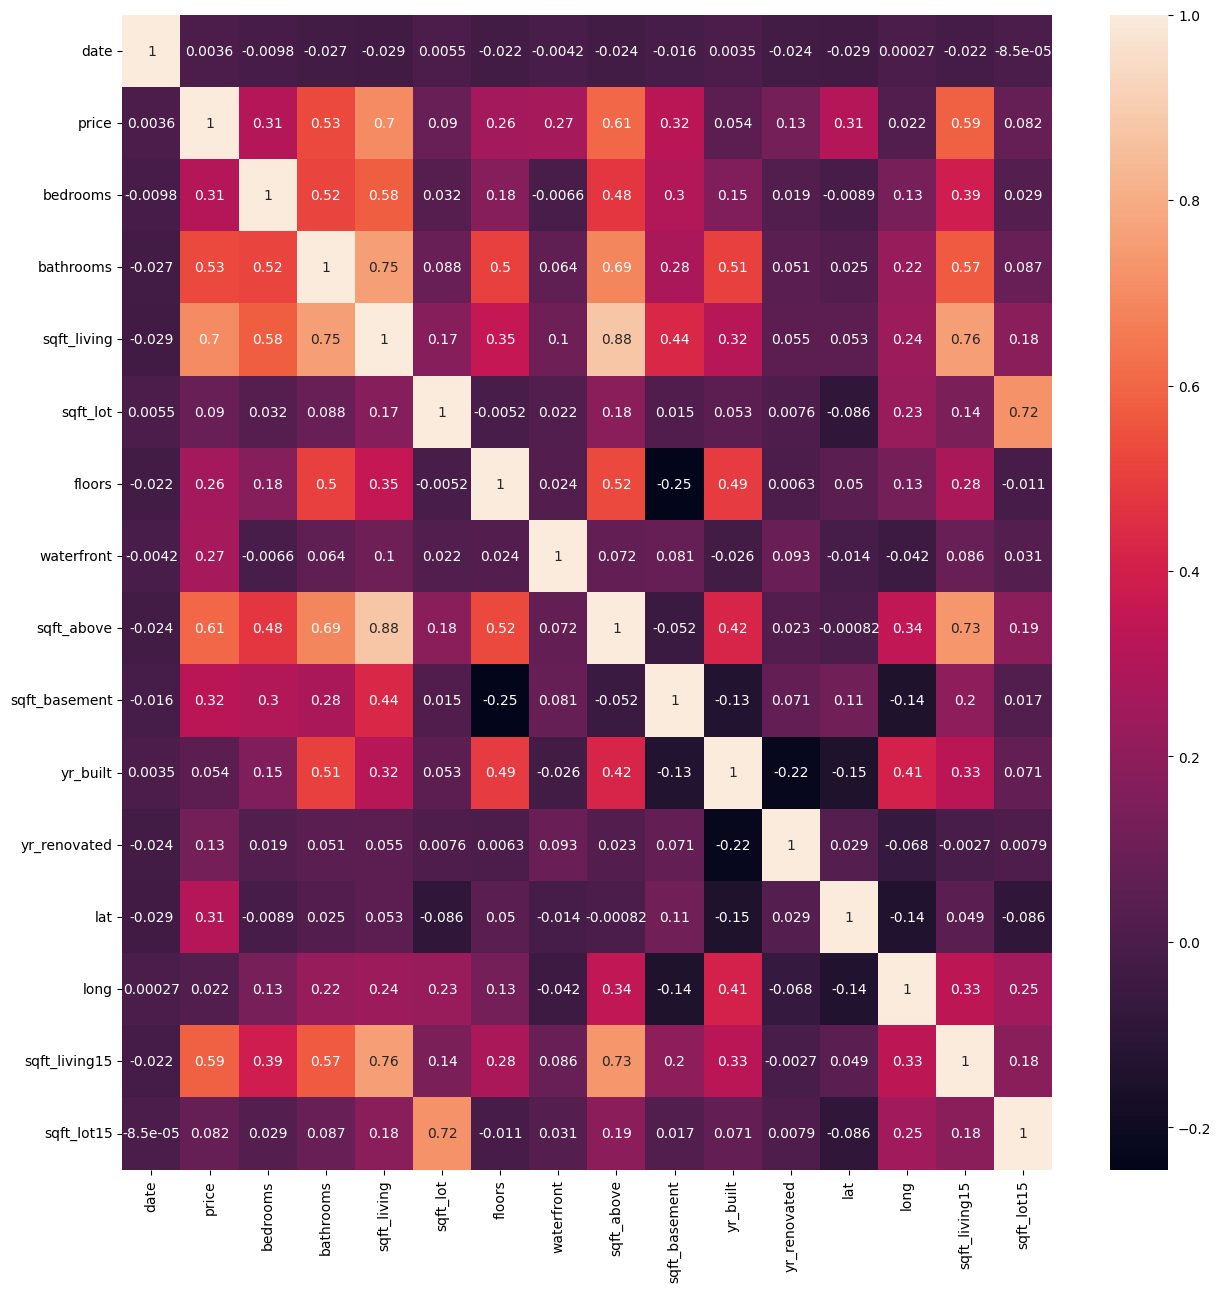

In [7]:
%matplotlib inline
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot= True)

## Preprocessing


In [8]:
#sqft_living is highly correlated with sqft_above, sqft_living15 and bathroms. 
#also sqft_lot and sqft_lot15 are correlated.
#So, these four variables are removed to eliminate multicollinarity. 
df = df.drop(["sqft_living15", "sqft_above", "bathrooms", "sqft_lot15"], axis = 1)
df.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,2014,221900.0,3,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257
1,2014,538000.0,3,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319
2,2015,180000.0,2,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233
3,2014,604000.0,4,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393
4,2015,510000.0,3,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045


In [9]:
#one-hot encoding
one_hot_view = pd.get_dummies(df.view)
view_columns = ["view_0", "view_1", "view_2", "view_3", "view_4"]
one_hot_view.columns = view_columns

one_hot_grade = pd.get_dummies(df.grade)
grade_columns = ["grade_1", "grade_3", "grade_4", "grade_5", "grade_6","grade_7","grade_8","grade_9","grade_10","grade_11","grade_12","grade_13"]
one_hot_grade.columns = grade_columns

one_hot_condition = pd.get_dummies(df.condition)
condition_columns = ["condition_1", "condiiton_2", "condition_3", "condition_4", "condition_5"]
one_hot_condition.columns = condition_columns

df = df.drop(['view','grade','condition'],axis=1)
df = df.join(one_hot_view)
df = df.join(one_hot_grade)
df = df.join(one_hot_condition)
df.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condiiton_2,condition_3,condition_4,condition_5
0,2014,221900.0,3,1180,5650,1.0,0,0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,2014,538000.0,3,2570,7242,2.0,0,400,1951,1991,...,0,0,0,0,0,0,0,1,0,0
2,2015,180000.0,2,770,10000,1.0,0,0,1933,0,...,0,0,0,0,0,0,0,1,0,0
3,2014,604000.0,4,1960,5000,1.0,0,910,1965,0,...,0,0,0,0,0,0,0,0,0,1
4,2015,510000.0,3,1680,8080,1.0,0,0,1987,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int32  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   yr_built       21613 non-null  int64  
 9   yr_renovated   21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  long           21613 non-null  float64
 12  view_0         21613 non-null  uint8  
 13  view_1         21613 non-null  uint8  
 14  view_2         21613 non-null  uint8  
 15  view_3         21613 non-null  uint8  
 16  view_4         21613 non-null  uint8  
 17  grade_1        21613 non-null  uint8  
 18  grade_

In [11]:
# PCA
X = df.drop('price',1)
X_meaned = X - np.mean(X, axis=0)
#standardization 
X = (X - X.mean()) / X.std(ddof=0)
#correlation matrix
X_corr = X.corr()
X_corr

C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\721482138.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('price',1)


,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,lat,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condiiton_2,condition_3,condition_4,condition_5
date,1.000000,-0.009838,-0.029038,0.005468,-0.022315,-0.004165,-0.015687,0.003507,-0.023707,-0.029212,...,-0.017453,-0.016078,-0.007247,0.006045,-0.004836,0.003485,0.016094,0.029159,-0.006757,-0.046427
bedrooms,-0.009838,1.000000,0.576671,0.031703,0.175429,-0.006582,0.303093,0.154178,0.018841,-0.008931,...,0.160519,0.135760,0.116428,0.059196,0.038916,-0.036246,-0.051950,0.004871,-0.008931,0.028119
sqft_living,-0.029038,0.576671,1.000000,0.172826,0.353949,0.103818,0.435043,0.318049,0.055363,0.052529,...,0.318419,0.369058,0.345771,0.238806,0.144329,-0.035069,-0.065324,0.102413,-0.083794,-0.018136
sqft_lot,0.005468,0.031703,0.172826,1.000000,-0.005201,0.021604,0.015286,0.053080,0.007644,-0.085683,...,0.049548,0.074335,0.077035,0.061535,0.007758,0.006323,0.037617,-0.011452,0.013157,-0.014497
floors,-0.022315,0.175429,0.353949,-0.005201,1.000000,0.023698,-0.245705,0.489319,0.006338,0.049614,...,0.243797,0.173683,0.118569,0.054571,0.021228,-0.023773,-0.055953,0.318049,-0.257795,-0.120545
waterfront,-0.004165,-0.006582,0.103818,0.021604,0.023698,1.000000,0.080588,-0.026161,0.092885,-0.014274,...,0.008656,0.046646,0.067503,0.085717,-0.002139,0.011115,-0.001789,-0.016606,0.008713,0.014243
sqft_basement,-0.015687,0.303093,0.435043,0.015286,-0.245705,0.080588,1.000000,-0.133124,0.071323,0.110538,...,0.018640,0.062053,0.077705,0.077555,0.062683,-0.018520,-0.025309,-0.151498,0.092712,0.127865
yr_built,0.003507,0.154178,0.318049,0.053080,0.489319,-0.026161,-0.133124,1.000000,-0.224874,-0.148122,...,0.219956,0.148728,0.098705,0.047053,0.004686,-0.050101,-0.067277,0.391719,-0.257414,-0.244353
yr_renovated,-0.023707,0.018841,0.055363,0.007644,0.006338,0.092885,0.071323,-0.224874,1.000000,0.029398,...,0.019602,0.002240,-0.003183,-0.002884,0.022997,-0.001671,-0.008571,0.069268,-0.054833,-0.030077
lat,-0.029212,-0.008931,0.052529,-0.085683,0.049614,-0.014274,0.110538,-0.148122,0.029398,1.000000,...,0.042223,0.052306,0.039394,0.017403,0.013143,0.004629,-0.022650,0.042297,-0.057481,0.025827


<AxesSubplot: >

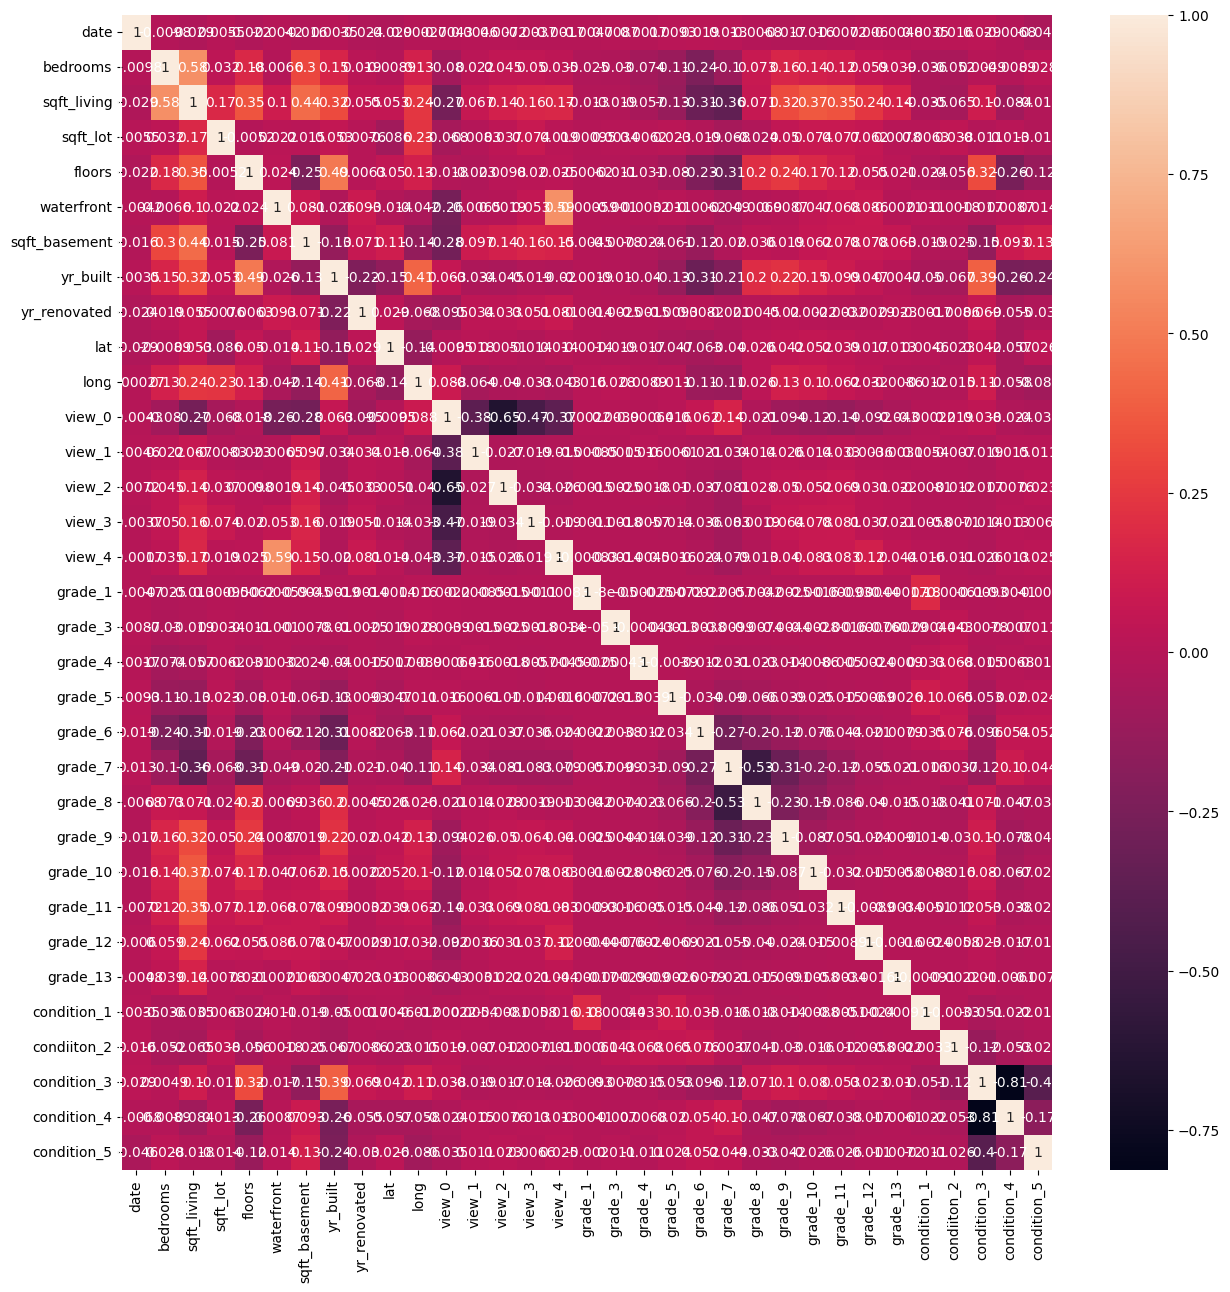

In [12]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(X_corr, annot= True)

In [13]:
#condition_3 and condition_4 are highly negatively correlated.
X = df.drop('price',1)
X = X.drop(["condition_4"], axis = 1)
X_meaned = X - np.mean(X, axis=0)
X = (X - X.mean()) / X.std(ddof=0)
#X = (X - X.min()) / (X.max()- X.min())
X_corr = X.corr()
X_corr

C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\2821524121.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('price',1)


,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,lat,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condiiton_2,condition_3,condition_5
date,1.000000,-0.009838,-0.029038,0.005468,-0.022315,-0.004165,-0.015687,0.003507,-0.023707,-0.029212,...,-0.006756,-0.017453,-0.016078,-0.007247,0.006045,-0.004836,0.003485,0.016094,0.029159,-0.046427
bedrooms,-0.009838,1.000000,0.576671,0.031703,0.175429,-0.006582,0.303093,0.154178,0.018841,-0.008931,...,0.073259,0.160519,0.135760,0.116428,0.059196,0.038916,-0.036246,-0.051950,0.004871,0.028119
sqft_living,-0.029038,0.576671,1.000000,0.172826,0.353949,0.103818,0.435043,0.318049,0.055363,0.052529,...,0.071326,0.318419,0.369058,0.345771,0.238806,0.144329,-0.035069,-0.065324,0.102413,-0.018136
sqft_lot,0.005468,0.031703,0.172826,1.000000,-0.005201,0.021604,0.015286,0.053080,0.007644,-0.085683,...,-0.024086,0.049548,0.074335,0.077035,0.061535,0.007758,0.006323,0.037617,-0.011452,-0.014497
floors,-0.022315,0.175429,0.353949,-0.005201,1.000000,0.023698,-0.245705,0.489319,0.006338,0.049614,...,0.201175,0.243797,0.173683,0.118569,0.054571,0.021228,-0.023773,-0.055953,0.318049,-0.120545
waterfront,-0.004165,-0.006582,0.103818,0.021604,0.023698,1.000000,0.080588,-0.026161,0.092885,-0.014274,...,-0.006859,0.008656,0.046646,0.067503,0.085717,-0.002139,0.011115,-0.001789,-0.016606,0.014243
sqft_basement,-0.015687,0.303093,0.435043,0.015286,-0.245705,0.080588,1.000000,-0.133124,0.071323,0.110538,...,0.036462,0.018640,0.062053,0.077705,0.077555,0.062683,-0.018520,-0.025309,-0.151498,0.127865
yr_built,0.003507,0.154178,0.318049,0.053080,0.489319,-0.026161,-0.133124,1.000000,-0.224874,-0.148122,...,0.199846,0.219956,0.148728,0.098705,0.047053,0.004686,-0.050101,-0.067277,0.391719,-0.244353
yr_renovated,-0.023707,0.018841,0.055363,0.007644,0.006338,0.092885,0.071323,-0.224874,1.000000,0.029398,...,0.004496,0.019602,0.002240,-0.003183,-0.002884,0.022997,-0.001671,-0.008571,0.069268,-0.030077
lat,-0.029212,-0.008931,0.052529,-0.085683,0.049614,-0.014274,0.110538,-0.148122,0.029398,1.000000,...,0.026337,0.042223,0.052306,0.039394,0.017403,0.013143,0.004629,-0.022650,0.042297,0.025827


In [14]:
#eigenvectors and values
val,vec=np.linalg.eig(X_corr)

In [15]:
# Sum of eigenvalues should be equal to the number of variables which is 32.
np.sum(val)

32.000000000000014

In [16]:
explained_variance=(val / np.sum(val))*100
explained_variance

array([ 1.03621876e+01,  7.91411487e+00,  4.05036866e-01,  5.06679222e+00,
        9.42198268e-01,  4.65157078e+00,  1.17649214e+00,  1.30732567e+00,
        4.40838481e+00,  4.30492470e+00,  1.70125593e+00,  1.81525844e+00,
        2.15637972e+00,  3.85173880e+00,  3.71867289e+00,  2.47982526e+00,
        3.51581492e+00,  2.70448009e+00,  2.77369550e+00,  2.89321419e+00,
        3.34713285e+00,  3.30705738e+00,  3.03747448e+00,  3.25101016e+00,
        3.23253620e+00,  3.18782640e+00,  3.14631089e+00,  3.13399581e+00,
        3.09703378e+00,  3.11025838e+00,  1.62085207e-14, -3.32169504e-16])

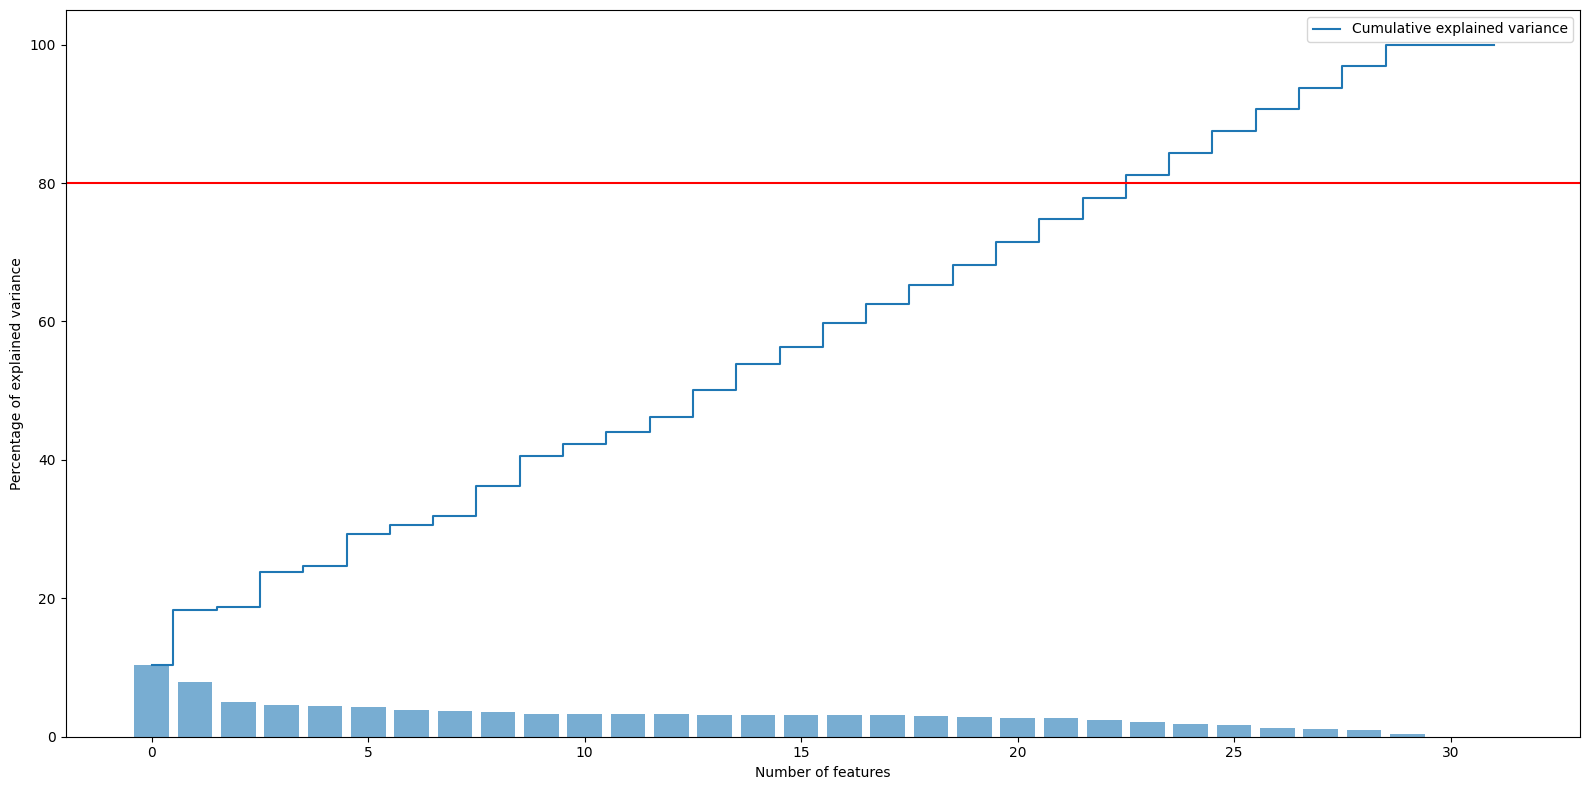

In [17]:
cum_sum_eigenvalues = np.cumsum(explained_variance)
plt.figure(figsize=(16,8))
plt.bar(range(32), sorted(explained_variance, reverse= True), alpha=0.6)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of features')
#%70-80 of the varience is appropriate. 

##REFERENCE NEEDED ####
plt.axhline(y = 80, color = 'r', linestyle = '-')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#number of features under the red line is selected.

In [18]:
#sorting the eigenvalues in descending order, then sorting the eigenvectors
sorted_index = np.argsort(val)[::-1]
sorted_eigenvalue = val[sorted_index]
sorted_eigenvectors = vec[:,sorted_index]
sorted_eigenvalue
sorted_eigenvectors

array([[-1.40954240e-02,  1.43574285e-02,  5.04076931e-02, ...,
         1.48538018e-03,  5.54170312e-17,  1.03954213e-17],
       [ 2.90189796e-01, -4.92146687e-02, -3.83928177e-01, ...,
        -1.98147758e-01,  4.75695295e-15,  9.12784042e-16],
       [ 4.68467275e-01, -9.32199033e-02, -2.30254644e-01, ...,
         7.80528015e-01, -1.76387960e-14, -4.36406799e-15],
       ...,
       [-6.83503843e-02, -2.91698010e-02,  4.84006659e-02, ...,
        -1.55555810e-03,  2.49810166e-16, -2.01206491e-17],
       [ 1.77948975e-01,  2.78969255e-01,  2.28149206e-01, ...,
        -6.02695404e-03,  2.85378542e-16, -2.42726775e-16],
       [-9.17469117e-02, -2.18391652e-01, -2.27197346e-01, ...,
         7.20962058e-03,  6.33877989e-17, -3.13402848e-16]])

In [19]:
# select the first n eigenvectors, n is desired number of features
# of our final reduced data.
 
n_components = 22 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
#eigenvector_subset

In [20]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
X_reduced = pd.DataFrame(X_reduced)
#the new X matrix
X_reduced.iloc[:,1]

0        0.355228
1       -0.571528
2       -0.010452
3       -2.012725
4        1.361112
           ...   
21608    2.010301
21609    1.567433
21610    1.447579
21611    2.056508
21612    1.435517
Name: 1, Length: 21613, dtype: float64

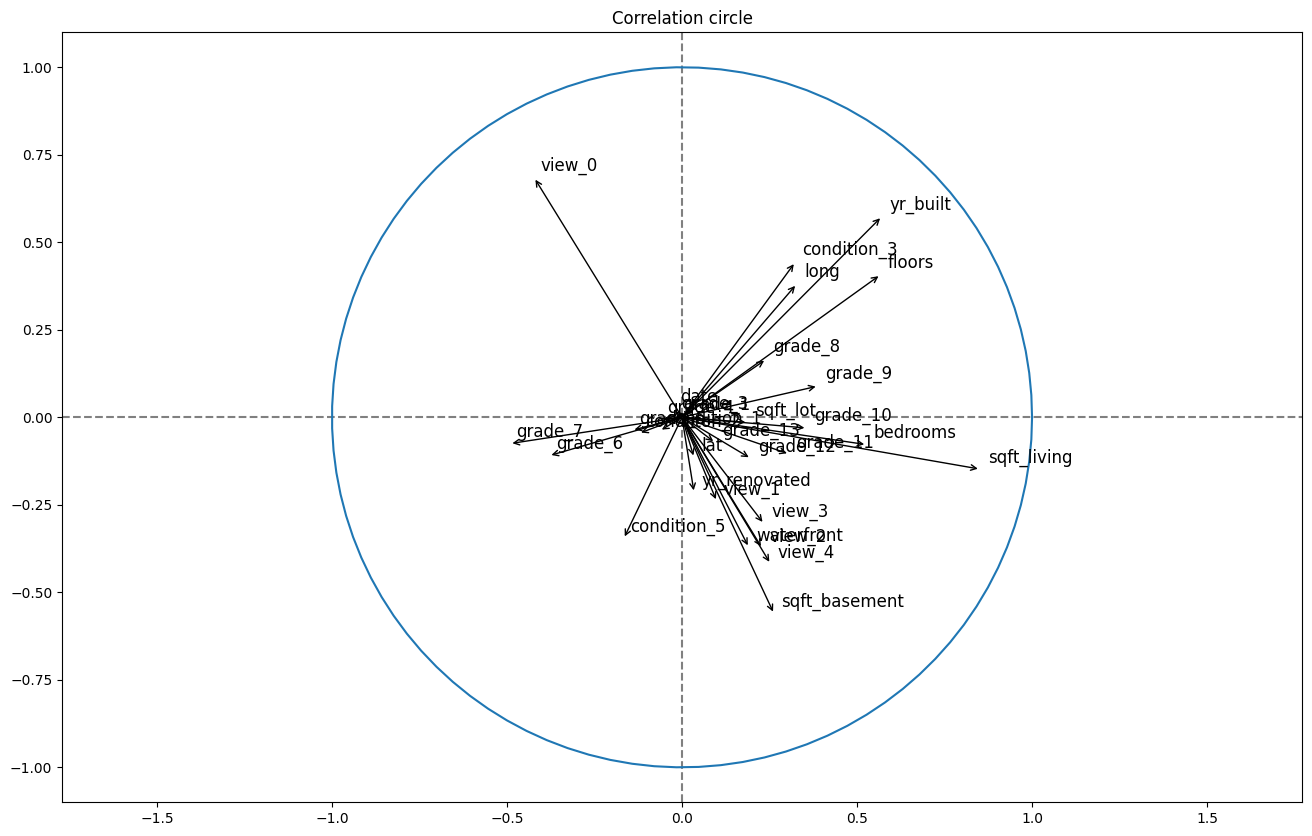

In [21]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(X_reduced[0],X_reduced[1])

## Linear Regression Model

In [22]:
def r_squared(y_true, y_pred):
    # calculate the mean of the true values
    y_mean = sum(y_true) / len(y_true)
    # calculate the total sum of squares (TSS)
    ss_tot = sum([(y_i - y_mean)**2 for y_i in y_true])
    ss_res = sum([(y_i - y_pred[i])**2 for i, y_i in enumerate(y_true)])
    r2 = 1 - (ss_res / ss_tot)
    
    return r2

In [23]:
def lin_reg(X_train, y_train, X_test, y_test):
    """
    all the inputs are in a dataframe format
    """
    X_train.insert(0, '1', 1) #for bias term
    X_test.insert(0, '1', 1)
    
    X_matrix_train = np.array(X_train)
    X_matrix_test = np.array(X_test)
    
    y_train = np.array(y_train)
    y_train = y_train.reshape(-1, 1)
    
    y_test = np.array(y_test)
    y_test = y_test.reshape(-1, 1)
    
    coefficients = np.linalg.inv(X_matrix_train.T @ X_matrix_train) @ X_matrix_train.T @ y_train
    
    y_train_pred = X_matrix_train @ coefficients
    y_test_pred = X_matrix_test @ coefficients
    
    rmse_train = math.sqrt(np.square(np.subtract(y_train,y_train_pred)).mean()) 
    rmse_test = math.sqrt(np.square(np.subtract(y_test,y_test_pred)).mean())
    
    r2_train = r_squared(y_train, y_train_pred)
    r2_test = r_squared(y_test, y_test_pred)
    
    #comparison_df = pd.DataFrame(np.hstack((y_test, y_test_pred.reshape(-1, 1))))
    
    return (rmse_test, rmse_train, r2_test, r2_train, y_test_pred, y_test,coefficients)

In [24]:
def k_fold_cv(X, y, k):
    """
    Perform k-fold cross-validation on the given dataset.
    X, y: containing the features X and target variable y in dataframe format
    k: number of folds
    return: the average error (RMSE) and R-squared over the k folds
    """
    n_samples = len(y)
    fold_size = n_samples // k
    rmse_val_list = []
    rmse_train_list = []
    r2_val_list = []
    r2_train_list = []
    coefficients_list = []
    
    for i in range(k):
        # split the data into training and test sets
        X_train = pd.DataFrame(np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]), axis=0))
        y_train = pd.DataFrame(np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]), axis=0))
        X_val = pd.DataFrame(X[i*fold_size:(i+1)*fold_size])
        y_val = pd.DataFrame(y[i*fold_size:(i+1)*fold_size])
        
        
        
        # make predictions on the test set
        rmse_val, rmse_train, r2_val, r2_train, y_val_pred, y_test, coefficients = lin_reg(X_train, y_train, X_val, y_val )
        
        # calculate the loss on the test set
        
        rmse_val_list.append(rmse_val)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        r2_train_list.append(r2_train)
        coefficients_list.append(coefficients)
        
    return (sum(rmse_val_list) / k, sum(rmse_train_list) / k, sum(r2_val_list) / k, sum(r2_train_list) / k, np.average(coefficients_list,axis=0))

In [25]:
X = df.drop('price',1)
y =pd.DataFrame(df.price)
X_meaned = X- np.mean(X, axis=0)
X = (X - X.mean()) / X.std(ddof=0)
y = (y - y.mean()) / y.std(ddof=0)
y
#X_scale = (X - X.min()) / (X.max()- X.min())
#y_meaned = y - np.mean(y, axis=0)
#y = (y - y.min()) / (y.max()- y.min())

C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\591874759.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('price',1)


,price
0,-0.866717
1,-0.005688
2,-0.980849
3,0.174090
4,-0.081958
...,...
21608,-0.490545
21609,-0.381588
21610,-0.375865
21611,-0.381588


In [26]:
#the percentage of data to use for training
train_p = 0.8
train_size = int(len(X_reduced) * train_p)
#shuffling the indices
indices = np.arange(len(X_reduced))
np.random.shuffle(indices)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train_no_PCA, y_train_no_PCA = X.iloc[train_indices,:], y.iloc[train_indices,:]
X_test_no_PCA, y_test_no_PCA = X.iloc[test_indices,:], y.iloc[test_indices,:]

# Split the dataset into training and testing sets
X_train, y_train = X_reduced.iloc[train_indices,:], y.iloc[train_indices,:]
X_last_test, y_last_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

X_test, y_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]


In [27]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
679,3.658703,1.256925,-0.832789,-1.364542,1.231192,-0.273978,-0.302726,0.021220,1.553028,-0.220919,...,2.308581,5.677742,0.571988,0.468625,1.039409,-0.294089,-0.157128,0.449000,0.927633,1.079981
3009,-0.318730,-1.938119,-1.902523,0.589677,0.119421,-2.036940,-2.102453,-0.257299,-2.883345,0.153174,...,-0.170781,0.200921,0.157417,-0.013251,-0.340839,0.034676,0.150905,0.636346,-0.357000,0.773566
16456,0.353414,1.707254,0.723868,0.225786,0.808069,-0.727072,1.628216,-0.161762,0.297334,0.277414,...,-0.082340,0.059994,0.298525,-0.599955,0.525631,-0.406739,-0.359560,-0.044320,-0.087303,-0.822302
16721,1.688148,-0.254531,0.178895,-0.015917,-0.660659,0.507856,-2.912945,-0.328034,0.046866,2.849666,...,-1.238423,-0.794815,-0.413844,0.262520,0.889058,-1.280753,2.196218,0.277454,0.811028,1.943053
6800,1.313546,1.236778,0.023162,-0.310580,0.381486,0.143372,-2.026059,-0.072716,-1.521683,0.530828,...,-0.221702,0.245657,0.059130,-0.236420,-0.362705,-0.252533,-0.339623,0.208880,-0.839420,-0.990580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,3.270703,0.672583,-0.785807,-0.879079,0.481960,-0.199716,-1.009994,0.153260,1.792658,-0.334237,...,2.261967,5.945853,0.419993,0.558846,0.522498,-0.389420,-0.255718,0.588706,0.135054,0.897803
2203,0.964264,1.959622,0.982410,0.679532,-0.127459,-0.488693,1.066907,0.029093,0.310833,0.246538,...,0.055460,-0.376701,-0.377070,0.415648,-0.068426,0.170248,0.557450,0.555699,-0.646399,0.385516
8853,0.967316,1.176586,-0.118656,-0.434763,1.054508,-0.459031,-1.327155,-0.183486,-2.294277,0.469124,...,-0.127605,0.116797,0.292955,-0.250063,-0.117117,0.058925,-0.176198,-0.034877,-0.431685,-0.103846
9279,-1.918519,-0.362101,-0.063127,-0.240942,-1.168381,1.160598,-0.411267,0.297219,0.371746,-0.210422,...,-0.056975,0.436338,0.165644,-0.153908,-0.517830,-0.089014,-0.661710,-0.021799,-0.363238,-0.852320


In [28]:
rmse_test_s, rmse_train_s, r2_test_s, r2_train_s, y_test_pred_s, y_test_s,coefficients_s = lin_reg(X_train, y_train, X_test, y_test)

In [29]:
print(r2_train_s)
print(r2_test_s)

[0.68984337]
[0.66695074]


In [30]:
X_train, y_train = X_reduced.iloc[train_indices,:], y.iloc[train_indices,:]
X_last_test, y_last_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

X_test, y_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

rmse_val3, rmse_train3, r2_val3, r2_train3, coef3 = k_fold_cv(X_train, y_train, 3)

print("k=3 RMSE val:", rmse_val3)
print("k=3 RMSE train:", rmse_train3)
print("k=3 R2 val:", r2_val3)
print("k=3 R2 train:", r2_train3)
print("Coefficients:", coef3)

k=3 RMSE val: 0.5715368855833709
k=3 RMSE train: 0.5662284379451908
k=3 R2 val: [0.68488187]
k=3 R2 train: [0.69084434]
Coefficients: [[ 0.00155552]
 [ 0.34744858]
 [-0.22071164]
 [-0.04716207]
 [-0.06301219]
 [-0.09556863]
 [-0.09597854]
 [-0.20384913]
 [ 0.01764498]
 [ 0.09922649]
 [-0.03814259]
 [ 0.09697854]
 [-0.12086858]
 [-0.02336645]
 [ 0.06416979]
 [-0.03150348]
 [ 0.02621811]
 [-0.05469706]
 [ 0.03413264]
 [-0.10289503]
 [ 0.09359087]
 [-0.11282357]
 [ 0.1125945 ]]


In [31]:
X_train, y_train = X_reduced.iloc[train_indices,:], y.iloc[train_indices,:]
X_last_test, y_last_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

X_test, y_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

rmse_val5, rmse_train5, r2_val5, r2_train5, coef5 = k_fold_cv(X_train, y_train, 5)

print("k=5 RMSE val:", rmse_val5)
print("k=5 RMSE train:", rmse_train5)
print("k=5 R2 val:", r2_val5)
print("k=5 R2 train:", r2_train5)
print("Coefficients:", coef5)
#for the sake of simplicity k= 5 is chosen.

k=5 RMSE val: 0.5708700586376434
k=5 RMSE train: 0.5666939220657417
k=5 R2 val: [0.6842056]
k=5 R2 train: [0.69029436]
Coefficients: [[ 0.00167436]
 [ 0.34762333]
 [-0.22097403]
 [-0.04686566]
 [-0.06349459]
 [-0.09573772]
 [-0.09638292]
 [-0.2037072 ]
 [ 0.01884807]
 [ 0.09906597]
 [-0.0383742 ]
 [ 0.09664018]
 [-0.12135311]
 [-0.02242634]
 [ 0.06365789]
 [-0.03165484]
 [ 0.02593733]
 [-0.0555862 ]
 [ 0.03313473]
 [-0.10264026]
 [ 0.09312097]
 [-0.11273062]
 [ 0.11302468]]


In [32]:
X_train, y_train = X_reduced.iloc[train_indices,:], y.iloc[train_indices,:]
X_last_test, y_last_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

X_test, y_test = X_reduced.iloc[test_indices,:], y.iloc[test_indices,:]

rmse_val10, rmse_train10, r2_val10, r2_train10, coef10 = k_fold_cv(X_train, y_train, 10)

print("k=10 RMSE val:", rmse_val10)
print("k=10 RMSE train:", rmse_train10)
print("k=10 R2 val:", r2_val10)
print("k=10 R2 train:", r2_train10)
print("Coefficients:", coef10)

k=10 RMSE val: 0.5720148960901521
k=10 RMSE train: 0.5668894546665915
k=10 R2 val: [0.68213873]
k=10 R2 train: [0.69015009]
Coefficients: [[ 0.00168357]
 [ 0.34768067]
 [-0.22104562]
 [-0.0468505 ]
 [-0.06352986]
 [-0.09589895]
 [-0.09641799]
 [-0.20375027]
 [ 0.01870918]
 [ 0.0991993 ]
 [-0.0382259 ]
 [ 0.09671084]
 [-0.12137144]
 [-0.0225523 ]
 [ 0.06366077]
 [-0.03169777]
 [ 0.02593055]
 [-0.05533608]
 [ 0.03340199]
 [-0.10280693]
 [ 0.09324891]
 [-0.1127783 ]
 [ 0.11296717]]


In [33]:
X_last_test.insert(0, '1', 1) #for bias term


In [34]:
y_pred_test = X_last_test @ coef5
#for the sake of simplicity 5 is chosen as k

In [35]:
y_pred_test

,0
679,1.786760
3009,0.867110
16456,-0.880179
16721,0.730445
6800,0.459684
...,...
729,2.187621
2203,-0.166421
8853,0.097624
9279,-0.354457


In [36]:
r_squared_test = r_squared(np.array(y_last_test),np.array(y_pred_test))
r_squared_test

array([0.66703452])

In [37]:
rmse_test = math.sqrt(np.mean((np.array(y_pred_test) - y_last_test) ** 2))
rmse_test

c:\Users\Megad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.531859478443233

## NEURAL NETWORK

In [38]:
# the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x)) 

def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def identity(x):
    return x
def identity_derivative(x):
    return 1

# initializing the weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    weights1 = np.random.randn(input_size, hidden_size) #(2,5) number of features, number of hidden layers
    bias1 = np.zeros((1, hidden_size)) #(1, 5)  1, number of hidden layers initially it is full of zeros
    weights2 = np.random.randn(hidden_size, output_size) #(5,1) number of hidden size, outut size which is 1
    bias2 = np.zeros((1, output_size)) #(1,1) 1, number of output units which is 1
    return weights1, bias1, weights2, bias2

def forward_propagation(X, weights1, bias1, weights2, bias2, activation_function):
    #the weighted sum of inputs at the hidden layer.
    weigh_sum1 = np.dot(X, weights1) + bias1 #(100,2) . (2,5) -> weigh_sum1 (100,5)
    
    #the result of the hidden layer after applying the activation function (sigmoid) to weigh_sum1
    activation1 = activation_function(weigh_sum1) #(100,5) same as weigh_sum1
    #the weighted sum of inputs at the output layer.
    weigh_sum2 = np.dot(activation1, weights2) + bias2 #(100,5) . (5,1) ->  weigh_sum2 (100,1)
    output = weigh_sum2 #(100,1)
    return activation1, output

def backward_propagation(X, y, activation1, output, weights1, weights2, learning_rate, bias1, bias2, derivative_function):
    n = X.shape[0] #number of rows
    #need to reshape y
    y_reshaped = y.reshape(-1, 1) #y_reshaped (100,1)
    #the error between actual y values and the output of the neural network
    
    output_errors = (output - y_reshaped) # (100,1)
    #the gradient of the loss function with respect to the output of the neural network. 
    grad_out = (1 / n) * np.dot(activation1.T, output_errors)  #(5,100) . (100,1) -> (5,1) 
    #the gradient of the loss function with respect to the biases of the output layer.
    bias_error2 = (1 / n) * np.sum(output_errors) 
    
    #the gradient of the loss function with respect to the output of the hidden layer.
    grad_hidden = np.dot(output_errors, weights2.T) * derivative_function(activation1) 
    # the gradient of the loss function with respect to the weights connecting the input layer to the hidden layer.
    grad_weigh = (1 / n) * np.dot(X.T, grad_hidden) 
    #the gradient of the loss function with respect to the biases of the hidden layer.
    bias_error1 = (1 / n) * np.sum(grad_hidden)
    
    #updating the weights and biases
    weights1 -= learning_rate * grad_weigh
    bias1 -= learning_rate * bias_error1
    weights2 -= learning_rate * grad_out
    bias2 -= learning_rate * bias_error2
    
    return weights1, bias1, weights2, bias2


# Train the neural network
def train_neural_network(X, y, input_size, hidden_size, output_size, learning_rate, num_epochs, activation_function, derivative_function):
    weights1, bias1, weights2, bias2 = initialize_parameters(input_size, hidden_size, output_size)
    
    for epoch in range(num_epochs):
        activation1, output = forward_propagation(X, weights1, bias1, weights2, bias2, activation_function)
        weights1, bias1, weights2, bias2 = backward_propagation(X, y, activation1, output, weights1, weights2, learning_rate, bias1, bias2, derivative_function)
        
        rmse = math.sqrt(np.mean((output - y) ** 2))
        r2 = r_squared(y, output)
        print(f"Epoch {epoch + 1}/{num_epochs}, Root Mean Squared Error: {rmse:.4f}, R2: {r2}")
    
    return weights1, bias1, weights2, bias2

# Make predictions
def predict(X, weights1, bias1, weights2, bias2,activation_function):
    _, output = forward_propagation(X, weights1, bias1, weights2, bias2, activation_function)
    return output


### With PCA

In [39]:
# Define hyperparameters
input_size = 22
hidden_size = 22
output_size = 1
learning_rate = 0.01
num_epochs = 50

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/50, Root Mean Squared Error: 21.4609, R2: [-433.49560956]
Epoch 2/50, Root Mean Squared Error: 10.5400, R2: [-107.08198823]
Epoch 3/50, Root Mean Squared Error: 7.3837, R2: [-47.43354117]
Epoch 4/50, Root Mean Squared Error: 5.0316, R2: [-23.19192967]
Epoch 5/50, Root Mean Squared Error: 4.0322, R2: [-11.84941769]
Epoch 6/50, Root Mean Squared Error: 2.8870, R2: [-6.22178832]
Epoch 7/50, Root Mean Squared Error: 2.5616, R2: [-3.29404091]
Epoch 8/50, Root Mean Squared Error: 1.9923, R2: [-1.6978887]
Epoch 9/50, Root Mean Squared Error: 1.8895, R2: [-0.78825258]
Epoch 10/50, Root Mean Squared Error: 1.6151, R2: [-0.24879344]
Epoch 11/50, Root Mean Squared Error: 1.5793, R2: [0.08192795]
Epoch 12/50, Root Mean Squared Error: 1.4523, R2: [0.29017513]
Epoch 13/50, Root Mean Squared Error: 1.4373, R2: [0.42405125]
Epoch 14/50, Root Mean Squared Error: 1.3802, R2: [0.5115067]
Epoch 15/50, Root Mean Squared Error: 1.3731, R2: [0.56934562]
Epoch 16/50, Root Mean Squared Error: 1.3479, R

In [40]:
y_pred_test_NN = predict(X_test, weights1, bias1, weights2, bias2, identity)
df_y_pred_test_NN = pd.DataFrame(y_pred_test_NN)
df_y_pred_test_NN.columns = ["NN y test preds"]
df_y_pred_test_NN

,NN y test preds
0,1.786808
1,0.867635
2,-0.880490
3,0.732266
4,0.459692
...,...
4318,2.187517
4319,-0.166489
4320,0.097629
4321,-0.354535


In [41]:
r_squared_test_NN = r_squared(np.array(y_test),np.array(y_pred_test_NN))
r_squared_test_NN

array([0.66696385])

In [42]:
rmse_test_NN = math.sqrt(np.mean((y_pred_test_NN - y_test) ** 2))
rmse_test_NN

c:\Users\Megad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5319159233310946

### Without PCA

In [43]:
# Define hyperparameters
input_size = 33
hidden_size = 22
output_size = 1
learning_rate = 0.01
num_epochs = 50

y_train_no_PCA = np.array(y_train_no_PCA).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train_no_PCA, y_train_no_PCA, input_size, hidden_size, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/50, Root Mean Squared Error: 24.8717, R2: [-607.72839804]
Epoch 2/50, Root Mean Squared Error: 12.0986, R2: [-136.57631489]
Epoch 3/50, Root Mean Squared Error: 8.1200, R2: [-63.28919611]
Epoch 4/50, Root Mean Squared Error: 6.2969, R2: [-34.23389733]
Epoch 5/50, Root Mean Squared Error: 4.8931, R2: [-20.68513365]
Epoch 6/50, Root Mean Squared Error: 4.1777, R2: [-13.46095905]
Epoch 7/50, Root Mean Squared Error: 3.5430, R2: [-9.17450198]
Epoch 8/50, Root Mean Squared Error: 3.1480, R2: [-6.43338488]
Epoch 9/50, Root Mean Squared Error: 2.8034, R2: [-4.59064406]
Epoch 10/50, Root Mean Squared Error: 2.5572, R2: [-3.30815682]
Epoch 11/50, Root Mean Squared Error: 2.3508, R2: [-2.39206001]
Epoch 12/50, Root Mean Squared Error: 2.1921, R2: [-1.72387249]
Epoch 13/50, Root Mean Squared Error: 2.0615, R2: [-1.22780919]
Epoch 14/50, Root Mean Squared Error: 1.9572, R2: [-0.85375952]
Epoch 15/50, Root Mean Squared Error: 1.8714, R2: [-0.56771641]
Epoch 16/50, Root Mean Squared Error: 1

In [44]:
input_size = 33
hidden_size = 33
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train_no_PCA = np.array(y_train_no_PCA).reshape(-1, )

weights1, bias1, weights2, bias2 = train_neural_network(X_train_no_PCA, y_train_no_PCA, input_size, hidden_size, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/100, Root Mean Squared Error: 36.2940, R2: [-1291.2642312]
Epoch 2/100, Root Mean Squared Error: 17.9727, R2: [-296.01496981]
Epoch 3/100, Root Mean Squared Error: 9.6089, R2: [-96.04376513]
Epoch 4/100, Root Mean Squared Error: 6.3152, R2: [-33.53344273]
Epoch 5/100, Root Mean Squared Error: 4.1848, R2: [-17.0847097]
Epoch 6/100, Root Mean Squared Error: 3.7518, R2: [-11.26222915]
Epoch 7/100, Root Mean Squared Error: 3.1901, R2: [-8.31800987]
Epoch 8/100, Root Mean Squared Error: 2.9735, R2: [-6.48029249]
Epoch 9/100, Root Mean Squared Error: 2.7313, R2: [-5.21249711]
Epoch 10/100, Root Mean Squared Error: 2.5828, R2: [-4.28800175]
Epoch 11/100, Root Mean Squared Error: 2.4471, R2: [-3.58707206]
Epoch 12/100, Root Mean Squared Error: 2.3441, R2: [-3.03851786]
Epoch 13/100, Root Mean Squared Error: 2.2545, R2: [-2.59748583]
Epoch 14/100, Root Mean Squared Error: 2.1796, R2: [-2.23467048]
Epoch 15/100, Root Mean Squared Error: 2.1139, R2: [-1.93037757]
Epoch 16/100, Root Mean S

### Different NN Structures

In [45]:
# 1 hidden layer, sigmoid, 0.1 learning rate hidden size 16
input_size = 22
hidden_size = 16
output_size = 1
learning_rate = 0.01
num_epochs = 50

# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/50, Root Mean Squared Error: 21.5898, R2: [-459.89592664]
Epoch 2/50, Root Mean Squared Error: 7.4336, R2: [-48.20368989]
Epoch 3/50, Root Mean Squared Error: 4.8337, R2: [-20.10598153]
Epoch 4/50, Root Mean Squared Error: 3.8823, R2: [-12.19864578]
Epoch 5/50, Root Mean Squared Error: 3.3532, R2: [-8.54629873]
Epoch 6/50, Root Mean Squared Error: 3.0214, R2: [-6.53036251]
Epoch 7/50, Root Mean Squared Error: 2.7921, R2: [-5.26390458]
Epoch 8/50, Root Mean Squared Error: 2.6217, R2: [-4.39042352]
Epoch 9/50, Root Mean Squared Error: 2.4878, R2: [-3.7454826]
Epoch 10/50, Root Mean Squared Error: 2.3782, R2: [-3.24465162]
Epoch 11/50, Root Mean Squared Error: 2.2857, R2: [-2.84081852]
Epoch 12/50, Root Mean Squared Error: 2.2059, R2: [-2.50588155]
Epoch 13/50, Root Mean Squared Error: 2.1360, R2: [-2.22211349]
Epoch 14/50, Root Mean Squared Error: 2.0739, R2: [-1.97777328]
Epoch 15/50, Root Mean Squared Error: 2.0184, R2: [-1.76474109]
Epoch 16/50, Root Mean Squared Error: 1.9682

In [46]:
# # 1 hidden layer, sigmoid, 0.1 learning rate hidden size 11
input_size = 22
hidden_size = 11
output_size = 1
learning_rate = 0.01
num_epochs = 50

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/50, Root Mean Squared Error: 15.5835, R2: [-245.64090163]
Epoch 2/50, Root Mean Squared Error: 8.7289, R2: [-74.1258248]
Epoch 3/50, Root Mean Squared Error: 6.6656, R2: [-42.2349257]
Epoch 4/50, Root Mean Squared Error: 5.4403, R2: [-27.37216911]
Epoch 5/50, Root Mean Squared Error: 4.6255, R2: [-19.15338911]
Epoch 6/50, Root Mean Squared Error: 4.0479, R2: [-14.12737185]
Epoch 7/50, Root Mean Squared Error: 3.6191, R2: [-10.82485255]
Epoch 8/50, Root Mean Squared Error: 3.2890, R2: [-8.53163421]
Epoch 9/50, Root Mean Squared Error: 3.0271, R2: [-6.86782978]
Epoch 10/50, Root Mean Squared Error: 2.8142, R2: [-5.61713225]
Epoch 11/50, Root Mean Squared Error: 2.6376, R2: [-4.64944068]
Epoch 12/50, Root Mean Squared Error: 2.4885, R2: [-3.88282665]
Epoch 13/50, Root Mean Squared Error: 2.3611, R2: [-3.26361393]
Epoch 14/50, Root Mean Squared Error: 2.2509, R2: [-2.75539248]
Epoch 15/50, Root Mean Squared Error: 2.1549, R2: [-2.33269148]
Epoch 16/50, Root Mean Squared Error: 2.07

In [47]:
# # 1 hidden layer, sigmoid, 0.01 learning rate 
input_size = 22
hidden_size = 22
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, sigmoid, sigmoid_derivative)


Epoch 1/100, Root Mean Squared Error: 1.8594, R2: [-1.94881401]
Epoch 2/100, Root Mean Squared Error: 1.8141, R2: [-1.77906001]
Epoch 3/100, Root Mean Squared Error: 1.7736, R2: [-1.62963218]
Epoch 4/100, Root Mean Squared Error: 1.7375, R2: [-1.49780359]
Epoch 5/100, Root Mean Squared Error: 1.7052, R2: [-1.38123978]
Epoch 6/100, Root Mean Squared Error: 1.6764, R2: [-1.27793738]
Epoch 7/100, Root Mean Squared Error: 1.6507, R2: [-1.18617344]
Epoch 8/100, Root Mean Squared Error: 1.6278, R2: [-1.10446328]
Epoch 9/100, Root Mean Squared Error: 1.6074, R2: [-1.03152529]
Epoch 10/100, Root Mean Squared Error: 1.5893, R2: [-0.96625143]
Epoch 11/100, Root Mean Squared Error: 1.5731, R2: [-0.90768232]
Epoch 12/100, Root Mean Squared Error: 1.5587, R2: [-0.85498629]
Epoch 13/100, Root Mean Squared Error: 1.5459, R2: [-0.80744147]
Epoch 14/100, Root Mean Squared Error: 1.5344, R2: [-0.76442062]
Epoch 15/100, Root Mean Squared Error: 1.5243, R2: [-0.72537823]
Epoch 16/100, Root Mean Squared Er

In [48]:
# # 1 hidden layer, relu, 0.01 learning rate hidden size 16
input_size = 22
hidden_size = 16
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )
# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, sigmoid, sigmoid_derivative)


Epoch 1/100, Root Mean Squared Error: 1.5916, R2: [-1.79114423]
Epoch 2/100, Root Mean Squared Error: 1.5808, R2: [-1.74954283]
Epoch 3/100, Root Mean Squared Error: 1.5708, R2: [-1.71092062]
Epoch 4/100, Root Mean Squared Error: 1.5616, R2: [-1.67497253]
Epoch 5/100, Root Mean Squared Error: 1.5531, R2: [-1.64142662]
Epoch 6/100, Root Mean Squared Error: 1.5451, R2: [-1.61004037]
Epoch 7/100, Root Mean Squared Error: 1.5378, R2: [-1.58059739]
Epoch 8/100, Root Mean Squared Error: 1.5310, R2: [-1.55290451]
Epoch 9/100, Root Mean Squared Error: 1.5246, R2: [-1.52678921]
Epoch 10/100, Root Mean Squared Error: 1.5187, R2: [-1.50209739]
Epoch 11/100, Root Mean Squared Error: 1.5131, R2: [-1.47869128]
Epoch 12/100, Root Mean Squared Error: 1.5078, R2: [-1.45644772]
Epoch 13/100, Root Mean Squared Error: 1.5029, R2: [-1.43525656]
Epoch 14/100, Root Mean Squared Error: 1.4982, R2: [-1.41501922]
Epoch 15/100, Root Mean Squared Error: 1.4938, R2: [-1.39564748]
Epoch 16/100, Root Mean Squared Er

In [49]:
# # 1 hidden layer, relu, 0.01 learning rate hidden size 22
input_size = 22
hidden_size = 22
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )
# Train the neural network
weights1, bias1, weights2, bias2 = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs, relu, relu_derivative)


Epoch 1/100, Root Mean Squared Error: 11.5988, R2: [-123.6012474]
Epoch 2/100, Root Mean Squared Error: 8.8981, R2: [-74.65913716]
Epoch 3/100, Root Mean Squared Error: 7.4692, R2: [-50.99293424]
Epoch 4/100, Root Mean Squared Error: 6.3955, R2: [-37.58064871]
Epoch 5/100, Root Mean Squared Error: 5.6724, R2: [-28.99964483]
Epoch 6/100, Root Mean Squared Error: 5.0923, R2: [-23.1204357]
Epoch 7/100, Root Mean Squared Error: 4.6497, R2: [-18.92495326]
Epoch 8/100, Root Mean Squared Error: 4.2934, R2: [-15.8453474]
Epoch 9/100, Root Mean Squared Error: 4.0090, R2: [-13.5355573]
Epoch 10/100, Root Mean Squared Error: 3.7782, R2: [-11.77069661]
Epoch 11/100, Root Mean Squared Error: 3.5897, R2: [-10.39794218]
Epoch 12/100, Root Mean Squared Error: 3.4339, R2: [-9.31201258]
Epoch 13/100, Root Mean Squared Error: 3.3048, R2: [-8.44363522]
Epoch 14/100, Root Mean Squared Error: 3.1971, R2: [-7.74047397]
Epoch 15/100, Root Mean Squared Error: 3.1064, R2: [-7.16392589]
Epoch 16/100, Root Mean S

In [50]:
# Initializing the weights for 2 hidden layer NN with sigmoid
def initialize_parameters2(input_size, hidden_size1, hidden_size2, output_size):
    np.random.seed(42)
    weights1 = np.random.randn(input_size, hidden_size1)
    bias1 = np.zeros((1, hidden_size1))
    weights2 = np.random.randn(hidden_size1, hidden_size2)
    bias2 = np.zeros((1, hidden_size2))
    weights3 = np.random.randn(hidden_size2, output_size)
    bias3 = np.zeros((1, output_size))
    return weights1, bias1, weights2, bias2, weights3, bias3

# Forward propagation
def forward_propagation2(X, weights1, bias1, weights2, bias2, weights3, bias3, activation_function):
    weigh_sum1 = np.dot(X, weights1) + bias1
    activation1 = activation_function(weigh_sum1)
    weigh_sum2 = np.dot(activation1, weights2) + bias2
    activation2 = activation_function(weigh_sum2)
    weigh_sum3 = np.dot(activation2, weights3) + bias3
    output = weigh_sum3
    return activation1, activation2, output

# Backward propagation
def backward_propagation2(X, y, activation1, activation2, output, weights1, weights2, weights3, learning_rate, bias1, bias2, bias3, derivative_function):
    n = X.shape[0]
    
    y_reshaped = y.reshape(-1, 1)
    
    output_errors = (output - y_reshaped)
    grad_out = (1 / n) * np.dot(activation2.T, output_errors)
    bias_error3 = (1 / n) * np.sum(output_errors)
    
    grad_hidden2 = np.dot(output_errors, weights3.T) * derivative_function(activation2)
    grad_weigh2 = (1 / n) * np.dot(activation1.T, grad_hidden2)
    bias_error2 = (1 / n) * np.sum(grad_hidden2)
    
    grad_hidden1 = np.dot(grad_hidden2, weights2.T) * derivative_function(activation1)
    grad_weigh1 = (1 / n) * np.dot(X.T, grad_hidden1)
    bias_error1 = (1 / n) * np.sum(grad_hidden1)

    weights1 -= learning_rate * grad_weigh1
    bias1 -= learning_rate * bias_error1
    weights2 -= learning_rate * grad_weigh2
    bias2 -= learning_rate * bias_error2
    weights3 -= learning_rate * grad_out
    bias3 -= learning_rate * bias_error3

    return weights1, bias1, weights2, bias2, weights3, bias3

def train_neural_network2(X, y, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs, activation_function, derivative_function):
    weights1, bias1, weights2, bias2, weights3, bias3 = initialize_parameters2(input_size, hidden_size1, hidden_size2, output_size)

    for epoch in range(num_epochs):
        activation1, activation2, output = forward_propagation2(X, weights1, bias1, weights2, bias2, weights3, bias3, activation_function)
        weights1, bias1, weights2, bias2, weights3, bias3 = backward_propagation2(X, y, activation1, activation2, output, weights1, weights2, weights3, learning_rate, bias1, bias2, bias3, derivative_function)

        rmse = math.sqrt(np.mean((output - y) ** 2))
        r2 = r_squared(y, output)
        print(f"Epoch {epoch + 1}/{num_epochs}, Root Mean Squared Error: {rmse:.4f}, R2: {r2}")

    return weights1, bias1, weights2, bias2, weights3, bias3


In [51]:
# 2 hidden layer, identity 0.01 learning rate
input_size = 22
hidden_size1 = 20
hidden_size2 = 15
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2, weights3, bias3 = train_neural_network2(X_train, y_train, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs, identity, identity_derivative)


Epoch 1/100, Root Mean Squared Error: 83.3669, R2: [-6641.18663172]
Epoch 2/100, Root Mean Squared Error: 1231.6994, R2: [-1463509.21528078]
Epoch 3/100, Root Mean Squared Error: 5569474105.8439, R2: [-2.99050733e+19]
Epoch 4/100, Root Mean Squared Error: 15550993120763082450587128644558260919074816.0000, R2: [-2.33148568e+86]


c:\Users\Megad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\3678512049.py:56: RuntimeWarning: overflow encountered in square
  rmse = math.sqrt(np.mean((output - y) ** 2))
C:\Users\Megad\AppData\Local\Temp\ipykernel_24184\1462054350.py:6: RuntimeWarning: overflow encountered in square
  ss_res = sum([(y_i - y_pred[i])**2 for i, y_i in enumerate(y_true)])


Epoch 5/100, Root Mean Squared Error: inf, R2: [-inf]
Epoch 6/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 7/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 8/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 9/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 10/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 11/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 12/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 13/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 14/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 15/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 16/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 17/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 18/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 19/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 20/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 21/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 22/100, Root Mean Squared Error: nan, R2: [nan]
Epoch 23/100, Root Mean Squared 

In [52]:
# 2 hidden layer, sigmoid 0.01 learning rate
input_size = 22
hidden_size1 = 20
hidden_size2 = 15
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2, weights3, bias3 = train_neural_network2(X_train, y_train, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs, sigmoid, sigmoid_derivative)


Epoch 1/100, Root Mean Squared Error: 3.6366, R2: [-11.39982564]
Epoch 2/100, Root Mean Squared Error: 3.3073, R2: [-9.20849902]
Epoch 3/100, Root Mean Squared Error: 3.0235, R2: [-7.48848085]
Epoch 4/100, Root Mean Squared Error: 2.7777, R2: [-6.12587427]
Epoch 5/100, Root Mean Squared Error: 2.5642, R2: [-5.03774546]
Epoch 6/100, Root Mean Squared Error: 2.3784, R2: [-4.16273539]
Epoch 7/100, Root Mean Squared Error: 2.2163, R2: [-3.45480039]
Epoch 8/100, Root Mean Squared Error: 2.0750, R2: [-2.87895318]
Epoch 9/100, Root Mean Squared Error: 1.9516, R2: [-2.40831041]
Epoch 10/100, Root Mean Squared Error: 1.8439, R2: [-2.02201037]
Epoch 11/100, Root Mean Squared Error: 1.7500, R2: [-1.7037212]
Epoch 12/100, Root Mean Squared Error: 1.6682, R2: [-1.44055672]
Epoch 13/100, Root Mean Squared Error: 1.5971, R2: [-1.22227793]
Epoch 14/100, Root Mean Squared Error: 1.5353, R2: [-1.0406981]
Epoch 15/100, Root Mean Squared Error: 1.4816, R2: [-0.88923443]
Epoch 16/100, Root Mean Squared Err

In [53]:
# 2 hidden layer, relu, 0.01 
input_size = 22
hidden_size1 = 20
hidden_size2 = 15
output_size = 1
learning_rate = 0.01
num_epochs = 100

y_train = np.array(y_train).reshape(-1, )

# Train the neural network
weights1, bias1, weights2, bias2, weights3, bias3 = train_neural_network2(X_train, y_train, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs, relu, relu_derivative)


Epoch 1/100, Root Mean Squared Error: 37.7778, R2: [-1381.64070083]
Epoch 2/100, Root Mean Squared Error: 185.1136, R2: [-32943.12865502]
Epoch 3/100, Root Mean Squared Error: 3.7767, R2: [-10.9173397]
Epoch 4/100, Root Mean Squared Error: 2.0161, R2: [-1.98961873]
Epoch 5/100, Root Mean Squared Error: 1.6667, R2: [-1.0038174]
Epoch 6/100, Root Mean Squared Error: 1.5212, R2: [-0.69427547]
Epoch 7/100, Root Mean Squared Error: 1.4567, R2: [-0.5840033]
Epoch 8/100, Root Mean Squared Error: 1.4287, R2: [-0.54392771]
Epoch 9/100, Root Mean Squared Error: 1.4156, R2: [-0.52422095]
Epoch 10/100, Root Mean Squared Error: 1.4077, R2: [-0.50942055]
Epoch 11/100, Root Mean Squared Error: 1.4020, R2: [-0.49597227]
Epoch 12/100, Root Mean Squared Error: 1.3971, R2: [-0.48305919]
Epoch 13/100, Root Mean Squared Error: 1.3926, R2: [-0.47048239]
Epoch 14/100, Root Mean Squared Error: 1.3883, R2: [-0.45818796]
Epoch 15/100, Root Mean Squared Error: 1.3841, R2: [-0.44615318]
Epoch 16/100, Root Mean Sq